In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

In [16]:
a=1.0 # width of the individual atom potentials
n=1 # number of atoms
d=a+.03*a # spacing between the atom centers

N=1500
x0, xN=0.0,(n+1)*d+a
h=(xN-x0)/N


c=-1.0/h**2

def V1(x):
    V0=0
    V1=2*10**3
    return (np.abs(x)<a/2)*V0 + (np.abs(x)>=a/2)*V1    


def V(x):
    
    ans=0
    for i in np.arange(1,n+1,1):
        ans=ans+ V1(x-i*d)
    return ans

In [12]:
x=np.arange(x0, xN + h, h)

(-0.10000000000000001, 2100)

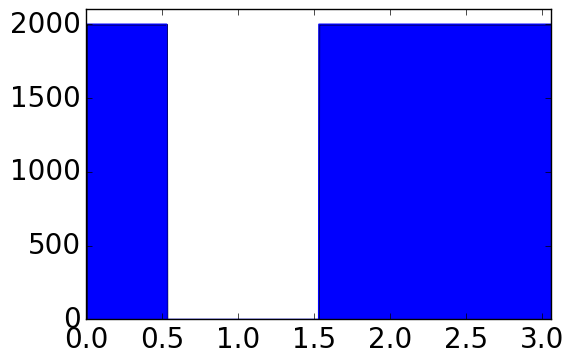

In [13]:
pl.figure(1)
pl.plot(x, V(x), '-')
pl.fill_between(x, V(x))
pl.xlim([min(x),max(x)])
pl.ylim([-0.1+min(V(x)),max(V(x))+100])

In [14]:
M = np.diag(V(x), k=0) + np.diag(np.array([c]*(len(x)-1)) , k=1) + np.diag(np.array([c]*(len(x)-1)) , k=-1)
evalues, evecs = np.linalg.eig(M)
index = evalues.argsort()
evalues=evalues[index]
evecs=evecs[:,index]

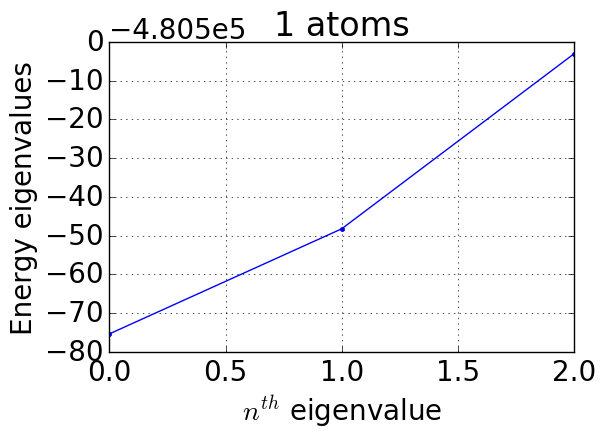

In [15]:
pl.rc("font", size=20)
pl.figure(figsize=(10,10))
fig, ax = pl.subplots()

ax.plot(evalues[:n*3],'.-')
pl.xlabel("$n^{th}$ eigenvalue")
pl.ylabel("Energy eigenvalues")
pl.title(str(n)+" atoms")
ax.grid(True)

In [23]:
#from IPython.html.widgets import interactive
#import networkx as nx
def plot_in(i):
    
    pl.rc("font", size=20)
    pl.figure(figsize=(8,4))
    pl.hold(True)
    
    # potential
    #pl.axvspan(min(x),-a, alpha=.1)
    #pl.axvspan(a,max(x), alpha=.1)
    pl.fill_between(x,V(x), alpha=.1)
    
    # eigenfunction
    pl.plot(x,evecs[:,i], linewidth=2)
    pl.grid(True)
    #pl.xlim([min(x), max(x)])
    pl.xlim([x[0],x[-1]])
    pl.ylim([np.min(evecs), np.max(evecs)])
    pl.xlabel("$x$")
    pl.ylabel("$\psi (x)$")
    
    pl.hold(False)

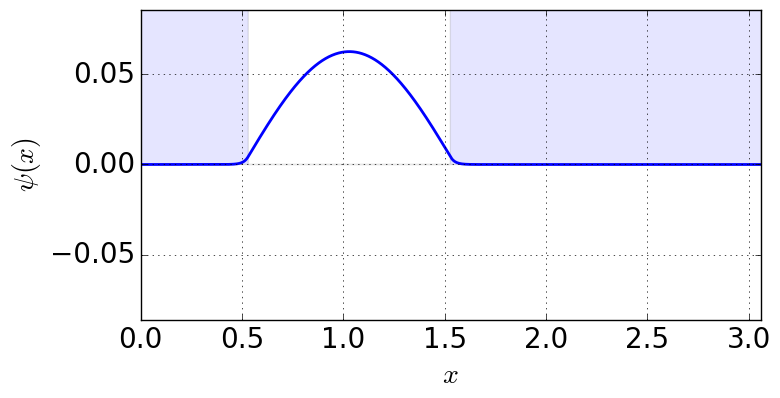

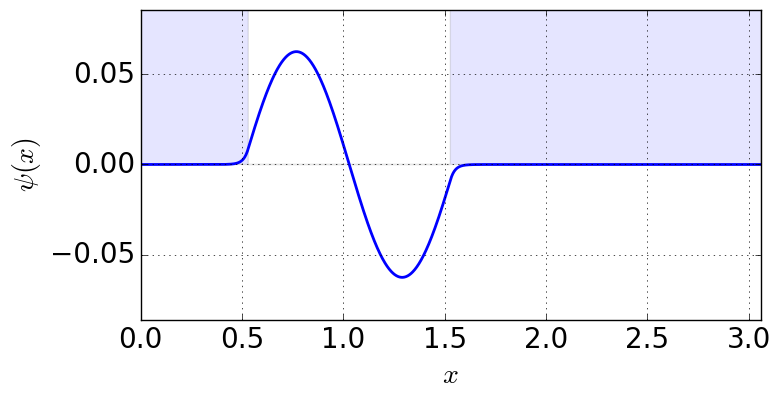

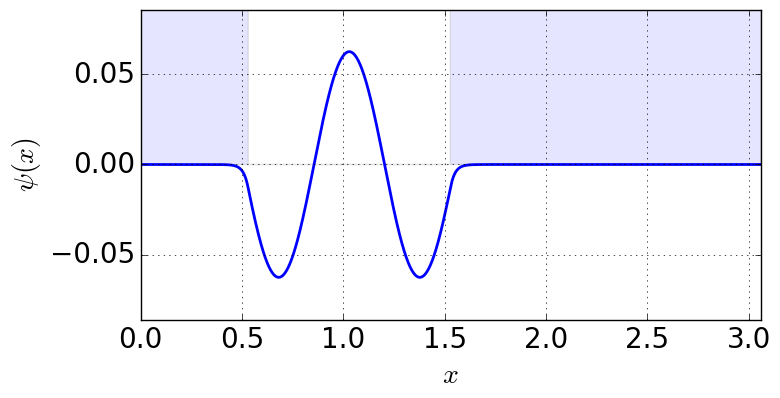

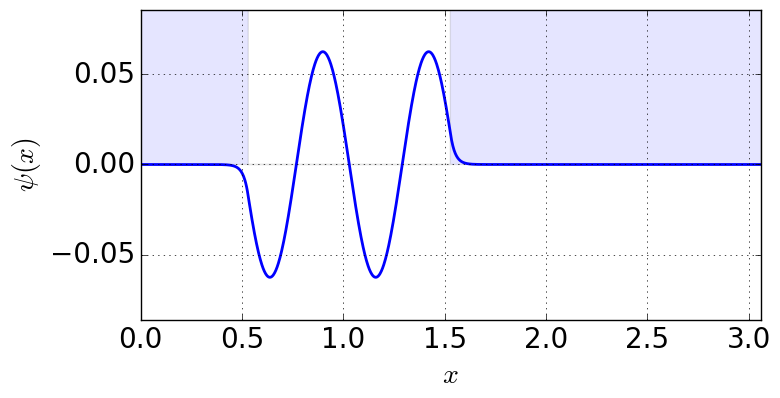

In [27]:
#interactive(plot_in, i=(0,10))
for i in range(0,4):
    plot_in(i)

In [9]:
def plot_ev(i):
    
    pl.rc("font", size=20)
    pl.figure(figsize=(8,8))
    pl.hold(True)
    
    
    # eigenfunction
    pl.plot(x,evecs[:,i], linewidth=2)
    pl.grid(True)
    #pl.xlim([min(x), max(x)])
    pl.xlim([x[0],x[-1]])
    pl.ylim([np.min(evecs), np.max(evecs)])
    pl.xlabel("$x$")
    pl.ylabel("$\psi (x)$")
    
    pl.hold(False)